# examples of calculations of synchtrotron sources (BM and wigglers) using srfunc

In [17]:
import matplotlib.pylab as plt

In [18]:
pltOk = True

## xraybooklet_fig2_1

# 
# example 1, Fig 2-1 in http://xdb.lbl.gov/Section2/Sec_2-1.html 
# 


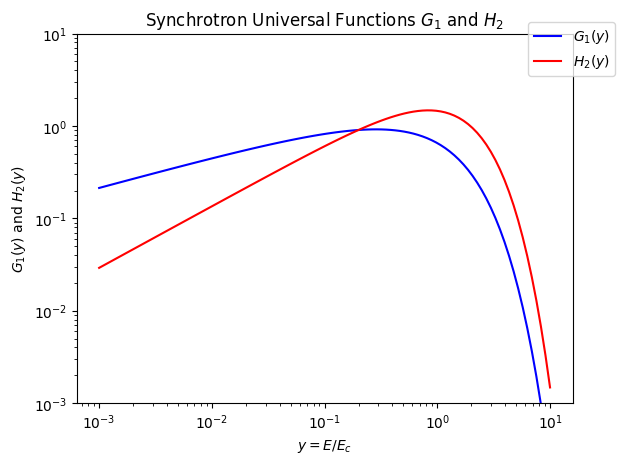

In [19]:
    from srxraylib.sources.srfunc import sync_g1, sync_hi
    print("# ")
    print("# example 1, Fig 2-1 in http://xdb.lbl.gov/Section2/Sec_2-1.html ")
    print("# ")
    y = numpy.logspace(-3,1,100)  #  from 0.001 to 10, 100 points
    g1 = sync_g1(y,polarization=0)
    h2 = sync_hi(y,i=2,polarization=0)
    # TODO: check transpose
    h2 = h2.T

    toptitle = "Synchrotron Universal Functions $G_1$ and $H_2$"
    xtitle = "$y=E/E_c$"
    ytitle = "$G_1(y)$ and $H_2(y)$"

    #pltOk = 0
    if pltOk:
        plt.figure(1)
        plt.loglog(y,g1,'b',label="$G_1(y)$")
        plt.loglog(y,h2,'r',label="$H_2(y)$")
        plt.title(toptitle)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
        plt.ylim((1e-3,10))
        ax = plt.subplot(111)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print("\n  %s  %s "%(xtitle,ytitle))
        for i in range(len(y)):
            print(" %f  %e %e "%(y[i],g1[i],h2[i]))

## xraybooklet_fig2_2

# 
# example  2, Fig 2-2 in http://xdb.lbl.gov/Section2/Sec_2-1.html 
# 


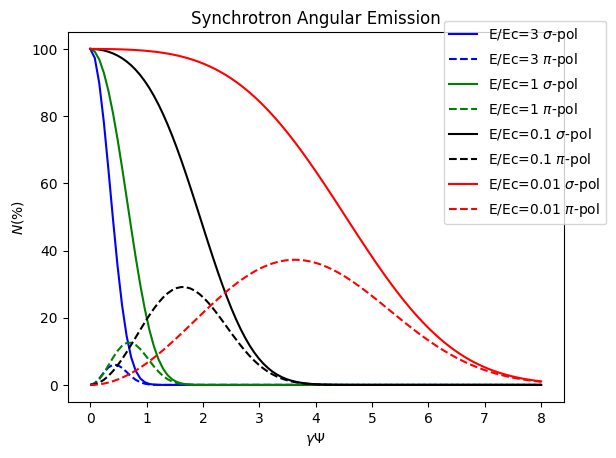

In [20]:
    from srxraylib.sources.srfunc import sync_f
    print("# ")
    print("# example  2, Fig 2-2 in http://xdb.lbl.gov/Section2/Sec_2-1.html ")
    print("# ")

    y = numpy.linspace(0,8,100)  #  from 0.001 to 10, 100 points
    f3   = sync_f(y,3.0,polarization=1)
    f3pi = sync_f(y,3.0,polarization=2)
    f1   = sync_f(y,1.0,polarization=1)
    f1pi = sync_f(y,1.0,polarization=2)
    fp1   = sync_f(y,0.1,polarization=1)
    fp1pi = sync_f(y,0.1,polarization=2)
    fp01   = sync_f(y,0.01,polarization=1)
    fp01pi = sync_f(y,0.01,polarization=2)

    toptitle = "Synchrotron Angular Emission"
    xtitle = "$\gamma \Psi$"
    ytitle = "$N(\%)$"

    f3.shape = -1
    f3pi.shape = -1
    f3max = f3.max()*1e-2 # to get %

    f1.shape = -1
    f1pi.shape = -1
    f1max = f1.max()*1e-2 # to get %

    fp01.shape = -1
    fp01pi.shape = -1
    fp01max = fp01.max()*1e-2 # to get %

    fp1.shape = -1
    fp1pi.shape = -1
    fp1max = fp1.max()*1e-2 # to get %

    if pltOk:
        plt.figure(2)
        plt.plot(y,f3/f3max,'b',label="E/Ec=3 $\sigma$-pol")
        plt.plot(y,f3pi/f3max,'b--',label="E/Ec=3 $\pi$-pol")

        plt.plot(y,f1/f1max,'g',label="E/Ec=1 $\sigma$-pol")
        plt.plot(y,f1pi/f1max,'g--',label="E/Ec=1 $\pi$-pol")

        plt.plot(y,fp1/fp1max,'k',label="E/Ec=0.1 $\sigma$-pol")
        plt.plot(y,fp1pi/fp1max,'k--',label="E/Ec=0.1 $\pi$-pol")

        plt.plot(y,fp01/fp01max,'r',label="E/Ec=0.01 $\sigma$-pol")
        plt.plot(y,fp01pi/fp01max,'r--',label="E/Ec=0.01 $\pi$-pol")

        plt.title(toptitle)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
        ax = plt.subplot(111)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print("\n  %s  %s "%(xtitle,ytitle))
        for i in range(len(y)):
            print(" %f  %e %e "%(y[i],f3[i],f3pi[i]))

## esrf_bm_spectrum

#
# example 3, ESRF1 BM spectrum
#


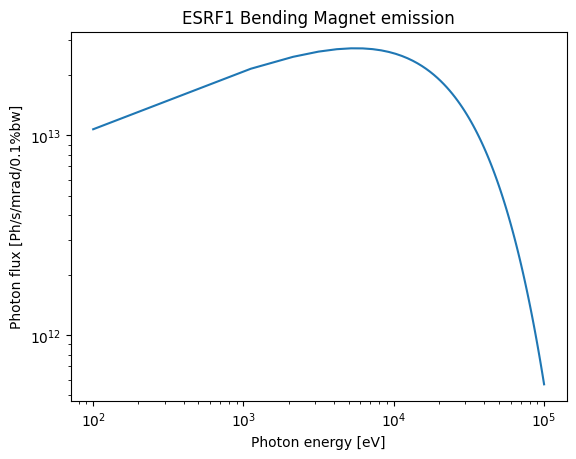

In [21]:
    from srxraylib.sources.srfunc import sync_ene
    print("#")
    print("# example 3, ESRF1 BM spectrum")
    print("#")
    # input for ESRF1
    e_gev = 6.04    # electron energy in GeV
    r_m = 25.0      # magnetic radius in m
    i_a = 0.2       # electron current in A
    # calculate critical energy in eV
    codata_mee = 1e-6 * codata.m_e * codata.c ** 2 / codata.e
    m2ev = codata.c * codata.h / codata.e  # lambda(m)  = m2eV / energy(eV)
    gamma = e_gev*1e3/codata_mee
    ec_m = 4.0*numpy.pi*r_m/3.0/numpy.power(gamma,3) # wavelength in m
    ec_ev = m2ev/ec_m

    energy_ev = numpy.linspace(100.0,100000.0,99) # photon energy grid
    f_psi = 0    # flag: full angular integration
    flux = sync_ene(f_psi,energy_ev,ec_ev=ec_ev,polarization=0,  \
           e_gev=e_gev,i_a=i_a,hdiv_mrad=1.0, \
           psi_min=0.0, psi_max=0.0, psi_npoints=1)

    toptitle = "ESRF1 Bending Magnet emission"
    xtitle = "Photon energy [eV]"
    ytitle = "Photon flux [Ph/s/mrad/0.1%bw]"

    if pltOk:
        plt.figure(3)
        plt.loglog(energy_ev,flux)
        plt.title(toptitle)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print("\n  %s  %s "%(xtitle,ytitle))
        for i in range(len(flux)):
            print(" %f  %12.3e"%(energy_ev[i],flux[i]))

## esrf_bm_angle_power

#
# example 4: ESRF1 BM angular emission of power
#


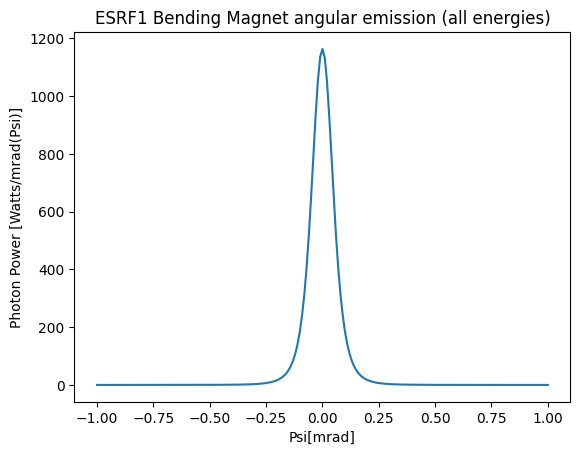

In [22]:
    from srxraylib.sources.srfunc import sync_ang
    print("#")
    print("# example 4: ESRF1 BM angular emission of power")
    print("#")
    # input for ESRF1
    e_gev = 6.04    # electron energy in GeV
    r_m = 25.0      # magnetic radius in m
    i_a = 0.2       # electron current in A

    angle_mrad = numpy.linspace(-1.0,1.0,201) # angle grid
    flag = 0 # full energy integration
    flux = sync_ang(flag,angle_mrad,polarization=0, \
           e_gev=e_gev,i_a=i_a,hdiv_mrad=1.0,r_m=r_m)

    #TODO: integrate curve and compare with total power
    toptitle = "ESRF1 Bending Magnet angular emission (all energies)"
    xtitle   = "Psi[mrad]"
    ytitle   = "Photon Power [Watts/mrad(Psi)]"
    if pltOk:
        plt.figure(4)
        plt.plot(angle_mrad,flux)
        plt.title(toptitle)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print("\n  %s  %s "%(xtitle,ytitle))
        for i in range(len(flux)):
            print("  %f  %f"%(angle_mrad[i],flux[i]))

## esrf_bm_angle_flux

#
# example 5: ESRF1 BM angular emission of flux
#


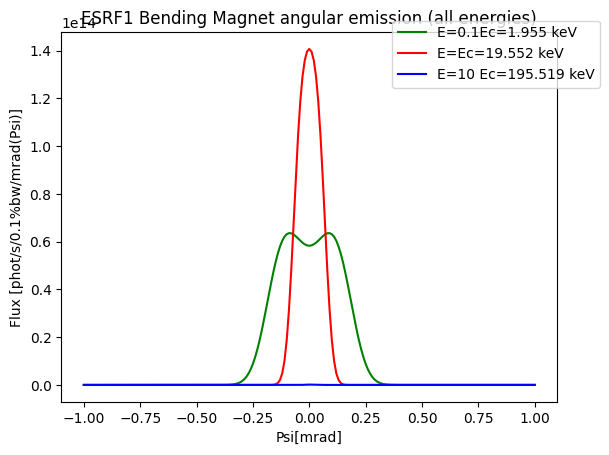

In [23]:
    from srxraylib.sources.srfunc import sync_ang
    print("#")
    print("# example 5: ESRF1 BM angular emission of flux")
    print("#")

    # input for ESRF1
    e_gev = 6.04    # electron energy in GeV
    r_m = 25.0      # magnetic radius in m
    i_a = 0.2       # electron current in A
    # calculate critical energy in eV
    codata_mee = 1e-6 * codata.m_e * codata.c ** 2 / codata.e
    m2ev = codata.c * codata.h / codata.e  # lambda(m)  = m2eV / energy(eV)
    gamma = e_gev*1e3/codata_mee
    ec_m = 4.0*numpy.pi*r_m/3.0/numpy.power(gamma,3) # wavelength in m
    ec_ev = m2ev/ec_m

    angle_mrad = numpy.linspace(-1.0,1.0,201) # angle grid
    flag = 1 # at at given energy
    fluxEc = sync_ang(flag,angle_mrad,polarization=0, \
           e_gev=e_gev,i_a=i_a,hdiv_mrad=1.0,energy=ec_ev, ec_ev=ec_ev)
    flux10Ec = sync_ang(flag,angle_mrad,polarization=0, \
           e_gev=e_gev,i_a=i_a,hdiv_mrad=1.0,energy=10*ec_ev, ec_ev=ec_ev)
    fluxp1Ec = sync_ang(flag,angle_mrad,polarization=0, \
           e_gev=e_gev,i_a=i_a,hdiv_mrad=1.0,energy=0.1*ec_ev, ec_ev=ec_ev)

    toptitle = "ESRF1 Bending Magnet angular emission (all energies)"
    xtitle   = "Psi[mrad]"
    ytitle   = "Flux [phot/s/0.1%bw/mrad(Psi)]"
    if pltOk:
        plt.figure(5)
        plt.plot(angle_mrad,fluxp1Ec,'g',label="E=0.1Ec=%.3f keV"%(ec_ev*.1*1e-3))
        plt.plot(angle_mrad,fluxEc,'r',label="E=Ec=%.3f keV"%(ec_ev*1e-3))
        plt.plot(angle_mrad,flux10Ec,'b',label="E=10 Ec=%.3f keV"%(ec_ev*10*1e-3))
        plt.title(toptitle)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
        ax = plt.subplot(111)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print("\n  %s  %s "%(xtitle,ytitle))
        for i in range(len(fluxEc)):
            print("  %f  %f"%(angle_mrad[i],fluxEc[i]))

## clarke_43

#
# Example 6 Slide 35 of
# http:https://www.cockcroft.ac.uk/wp-content/uploads/2014/12/Lecture-1.pdf
#
Gamma: 5870.853551 

Critical wavelength [A]: 1.479644 

Critical photon energy [eV]: 8379.323556 

for E = 0.1 Ec FWHM=0.773154 mrad 
for E =     Ec FWHM=0.273826 mrad 
for E = 10  Ec FWHM=0.080537 mrad 
Using approximated formula: 
for E = 0.1 Ec FWHM=0.604871 mrad 
for E =     Ec FWHM=0.227333 mrad 
for E = 10  Ec FWHM=0.085440 mrad 


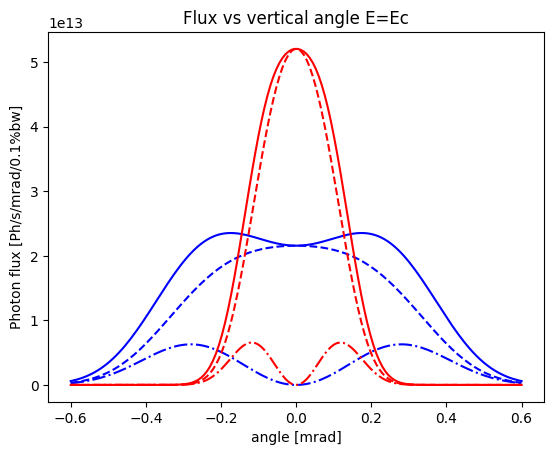

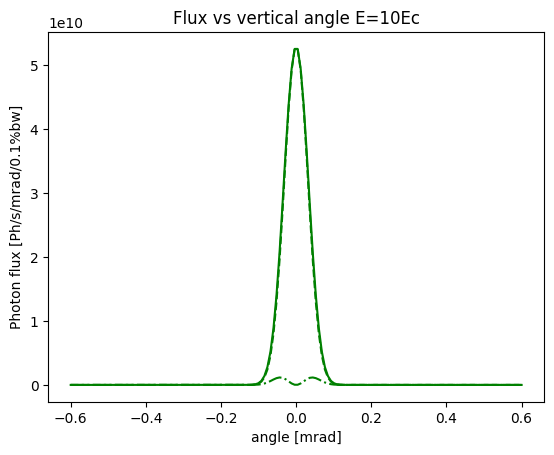

In [24]:
    from srxraylib.sources.srfunc import sync_ene
    from mpl_toolkits.mplot3d import Axes3D  # need for example 6
    print("#")
    print("# Example 6 Slide 35 of")
    print("# http:https://www.cockcroft.ac.uk/wp-content/uploads/2014/12/Lecture-1.pdf")
    print("#")


    def calcFWHM(h,binSize):
        t = numpy.where(h>=max(h)*0.5)
        return binSize*(t[0][-1]-t[0][0]+1), t[0][-1], t[0][0]
    #
    e_gev = 3.0    # electron energy in GeV
    b_t = 1.4      # magnetic radius in m
    i_a = 0.3      # electron current in A

    codata_mee = 1e-6 * codata.m_e * codata.c ** 2 / codata.e
    gamma = e_gev*1e3/codata_mee

    #calculates Magnetic radius
    #cte = codata.m_e*codata.c/codata.e*(1/(codata_mee*1e-3)) # 0.3
    #r_m = cte*e_gev/b_t
    #more exactly
    r_m = codata.m_e*codata.c/codata.e/b_t*numpy.sqrt( gamma*gamma - 1)

    # calculate critical energy in eV
    ec_m = 4.0*numpy.pi*r_m/3.0/numpy.power(gamma,3) # wavelength in m
    m2ev = codata.c * codata.h / codata.e  # lambda(m)  = m2eV / energy(eV)
    ec_ev = m2ev/ec_m


    print("Gamma: %f \n"%(gamma))
    print("Critical wavelength [A]: %f \n"%(1e10*ec_m))
    print("Critical photon energy [eV]: %f \n"%(ec_ev))

    e = numpy.array([0.1*ec_ev,ec_ev,10*ec_ev])
    a = numpy.linspace(-0.6,0.6,150)

    fm = sync_ene(4,e,ec_ev=ec_ev,e_gev=e_gev,i_a=i_a,\
        hdiv_mrad=1,psi_min=-0.6,psi_max=0.6,psi_npoints=150)

    fmPar = sync_ene(4,e,ec_ev=ec_ev,e_gev=e_gev,i_a=i_a,\
        hdiv_mrad=1,psi_min=-0.6,psi_max=0.6,psi_npoints=150,polarization=1)
    fmPer = sync_ene(4,e,ec_ev=ec_ev,e_gev=e_gev,i_a=i_a,\
        hdiv_mrad=1,psi_min=-0.6,psi_max=0.6,psi_npoints=150,polarization=2)
    toptitle='Flux vs vertical angle '
    xtitle  ='angle [mrad]'
    ytitle = "Photon flux [Ph/s/mrad/0.1%bw]"

    print("for E = 0.1 Ec FWHM=%f mrad "%( calcFWHM(fm[:,0],a[1]-a[0])[0]))
    print("for E =     Ec FWHM=%f mrad "%( calcFWHM(fm[:,1],a[1]-a[0])[0]))
    print("for E = 10  Ec FWHM=%f mrad "%( calcFWHM(fm[:,2],a[1]-a[0])[0]))

    print("Using approximated formula: ")
    print("for E = 0.1 Ec FWHM=%f mrad "%( 0.682 / e_gev * numpy.power(10.0,0.425) ))
    print("for E =     Ec FWHM=%f mrad "%( 0.682 / e_gev * numpy.power(1.0,0.425) ))
    print("for E = 10  Ec FWHM=%f mrad "%( 0.682 / e_gev * numpy.power(0.1,0.425) ))

    if pltOk:
        plt.figure(61)
        plt.plot(a,fm[:,0],'b',label="0.1*$\omega_c$")
        plt.plot(a,fmPar[:,0],"b--")
        plt.plot(a,fmPer[:,0],"b-.")
        plt.title(toptitle+"E=0.1Ec")
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)

        plt.figure(61)
        plt.plot(a,fm[:,1],'red',label="$\omega_c$")
        plt.plot(a,fmPar[:,1],"r--")
        plt.plot(a,fmPer[:,1],"r-.")
        plt.title(toptitle+"E=Ec")
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)

        plt.figure(62)
        plt.plot(a,fm[:,2],'green',label="10*$\omega_c$")
        plt.plot(a,fmPar[:,2],"g--")
        plt.plot(a,fmPer[:,2],"g-.")
        plt.title(toptitle+"E=10Ec")
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)

    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print("\n  %s  %s %s "%(ytitle,xtitle,"Flux"))
        for j in range(len(e)):
            for i in range(len(a)):
                print("  %f  %f  %e   "%(e[j],a[i],fm[i,j]))

## esrf_bm_2d

#
# Example 7, ESRF1 flux vs energy and angle
#


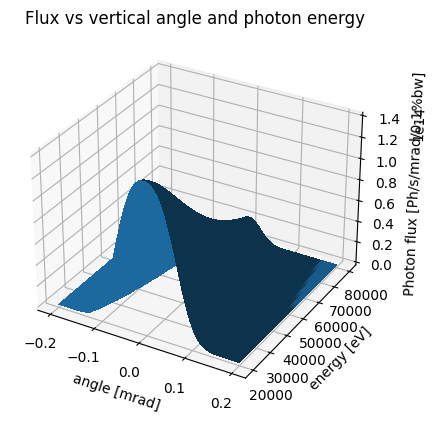

In [25]:
    from srxraylib.sources.srfunc import sync_ene
    print("#")
    print("# Example 7, ESRF1 flux vs energy and angle")
    print("#")
    # input for ESRF1
    e_gev = 6.04    # electron energy in GeV
    r_m = 25.0      # magnetic radius in m
    i_a = 0.2       # electron current in A
    # calculate critical energy in eV
    codata_mee = 1e-6 * codata.m_e * codata.c ** 2 / codata.e
    gamma = e_gev*1e3/codata_mee
    ec_m = 4.0*numpy.pi*r_m/3.0/numpy.power(gamma,3) # wavelength in m
    m2ev = codata.c * codata.h / codata.e  # lambda(m)  = m2eV / energy(eV)
    ec_ev = m2ev/ec_m

    a = numpy.linspace(-0.2,0.2,50)
    e = numpy.linspace(20000,80000,80)

    fm = sync_ene(4,e,ec_ev=ec_ev,e_gev=e_gev,i_a=i_a,\
        hdiv_mrad=1,psi_min=a.min(),psi_max=a.max(),psi_npoints=a.size)
    toptitle='Flux vs vertical angle and photon energy'
    xtitle  ='angle [mrad]'
    ytitle  ='energy [eV]'
    ztitle = "Photon flux [Ph/s/mrad/0.1%bw]"

    if pltOk:
        fig = plt.figure(7)
        ax = fig.add_subplot(111, projection='3d')
        fa, fe = numpy.meshgrid(a, e)
        surf = ax.plot_surface(fa, fe, fm.T, \
            rstride=1, cstride=1, \
            linewidth=0, antialiased=False)

        plt.title(toptitle)
        ax.set_xlabel(xtitle)
        ax.set_ylabel(ytitle)
        ax.set_zlabel(ztitle)

    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print("\n  %s  %s %s "%(xtitle,ytitle,ztitle))
        for i in range(len(a)):
            for j in range(len(e)):
                print("  %f  %f  %e   "%(a[i],e[j],fm[i,j]))

## wiggler_flux_vs_r

#
# Example 8 (Wiggler flux vs bending radius at a given photon energy)
#


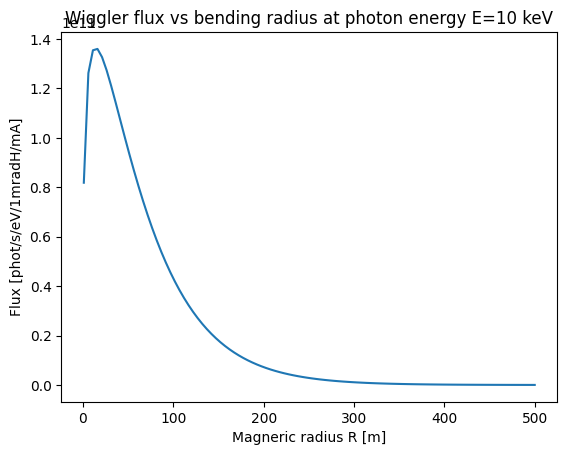

In [26]:
    from srxraylib.sources.srfunc import wiggler_nphoton
    print("#")
    print("# Example 8 (Wiggler flux vs bending radius at a given photon energy)")
    print("#")
    r_m = numpy.linspace(1.0,500.0,100)
    flux = wiggler_nphoton(r_m,electronEnergy=6.04,photonEnergy=10000.0)
    toptitle = "Wiggler flux vs bending radius at photon energy E=10 keV"
    xtitle   = "Magneric radius R [m]"
    ytitle   = "Flux [phot/s/eV/1mradH/mA]"

    if pltOk:
        plt.figure(8)
        plt.plot(r_m,flux)
        plt.title(toptitle)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print("\n  %s  %s "%(xtitle,ytitle))
        for i in range(len(r_m)):
            print("  %f  %e"%(r_m[i],flux[i]))

## wiggler_external_b

#
# Example 9 (Wiggler trajectory and flux for a 3pole wiggler 
#
File with trajectory written to file: tmpS.traj
File with trajectory written to file: tmpB.traj
file tmp.h written to disk (harmonics).
File with trajectory written to file: tmpH.traj

Electron beam energy (from velocities) = 6.040000 GeV 

gamma (from velocities) = 11819.985178 
curvature (max) = 0.0205985 m 
          (min) = 0.000326814 m 
Radius of curvature (max) = 3059.84 m 
                    (min) = 48.5473 m 
Critical Energy (max.) = 10068.5 eV
                (min.) = 159.746 eV
File with wiggler spectrum written to file: tmp.dat

Electron beam energy (from velocities) = 6.040000 GeV 

gamma (from velocities) = 11819.985057 
curvature (max) = 0.0542317 m 
          (min) = 4.26857e-06 m 
Radius of curvature (max) = 234271 m 
                    (min) = 18.4394 m 
Critical Energy (max.) = 26508.3 eV
                (min.) = 2.08646 eV
File with wiggler spectrum written to file: tmp.dat

Electron beam energy (fr

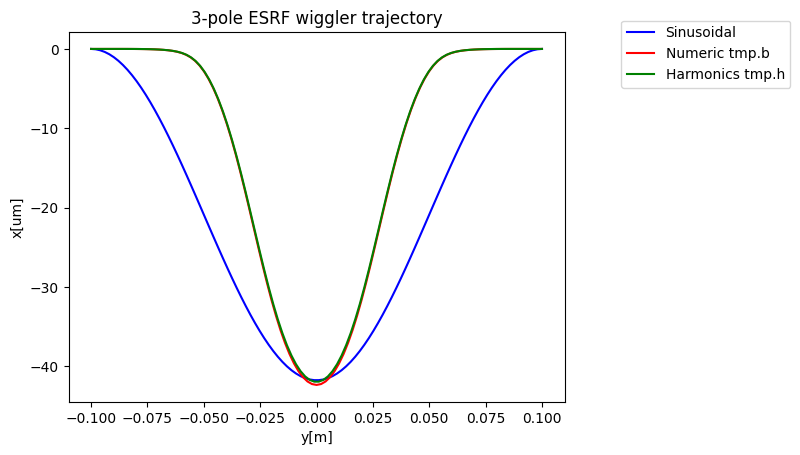

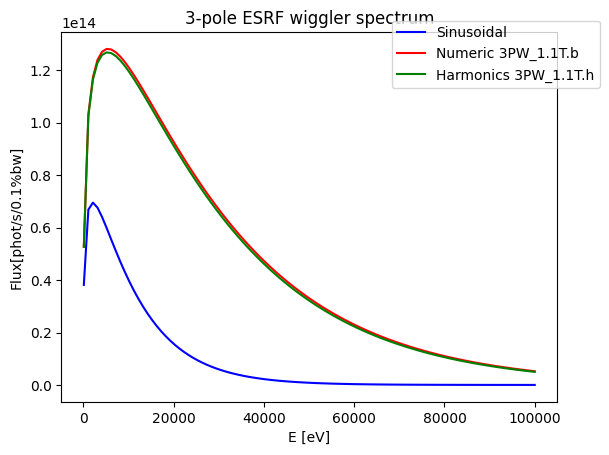

In [27]:
    from srxraylib.sources.srfunc import wiggler_trajectory, wiggler_spectrum, wiggler_harmonics
    print("#")
    print("# Example 9 (Wiggler trajectory and flux for a 3pole wiggler ")
    print("#")

    # this is the B(s) map (T, m)
    b_t = numpy.array([[ -1.00000000e-01,   1.08200000e-03],
   [ -9.80000000e-02,   8.23000000e-04],
   [ -9.60000000e-02,   4.45000000e-04],
   [ -9.40000000e-02,   8.60000000e-05],
   [ -9.20000000e-02,  -4.93000000e-04],
   [ -9.00000000e-02,  -1.20800000e-03],
   [ -8.80000000e-02,  -2.16100000e-03],
   [ -8.60000000e-02,  -3.44500000e-03],
   [ -8.40000000e-02,  -5.10500000e-03],
   [ -8.20000000e-02,  -7.34500000e-03],
   [ -8.00000000e-02,  -1.03050000e-02],
   [ -7.80000000e-02,  -1.42800000e-02],
   [ -7.60000000e-02,  -1.96770000e-02],
   [ -7.40000000e-02,  -2.70560000e-02],
   [ -7.20000000e-02,  -3.73750000e-02],
   [ -7.00000000e-02,  -5.20600000e-02],
   [ -6.80000000e-02,  -7.35170000e-02],
   [ -6.60000000e-02,  -1.05680000e-01],
   [ -6.40000000e-02,  -1.54678000e-01],
   [ -6.20000000e-02,  -2.28784000e-01],
   [ -6.00000000e-02,  -3.34838000e-01],
   [ -5.80000000e-02,  -4.70272000e-01],
   [ -5.60000000e-02,  -6.16678000e-01],
   [ -5.40000000e-02,  -7.46308000e-01],
   [ -5.20000000e-02,  -8.39919000e-01],
   [ -5.00000000e-02,  -8.96470000e-01],
   [ -4.80000000e-02,  -9.26065000e-01],
   [ -4.60000000e-02,  -9.38915000e-01],
   [ -4.40000000e-02,  -9.40738000e-01],
   [ -4.20000000e-02,  -9.32236000e-01],
   [ -4.00000000e-02,  -9.08918000e-01],
   [ -3.80000000e-02,  -8.60733000e-01],
   [ -3.60000000e-02,  -7.73534000e-01],
   [ -3.40000000e-02,  -6.36577000e-01],
   [ -3.20000000e-02,  -4.52611000e-01],
   [ -3.00000000e-02,  -2.37233000e-01],
   [ -2.80000000e-02,  -7.09700000e-03],
   [ -2.60000000e-02,   2.26731000e-01],
   [ -2.40000000e-02,   4.54558000e-01],
   [ -2.20000000e-02,   6.61571000e-01],
   [ -2.00000000e-02,   8.29058000e-01],
   [ -1.80000000e-02,   9.45984000e-01],
   [ -1.60000000e-02,   1.01683300e+00],
   [ -1.40000000e-02,   1.05536200e+00],
   [ -1.20000000e-02,   1.07490000e+00],
   [ -1.00000000e-02,   1.08444200e+00],
   [ -8.00000000e-03,   1.08898000e+00],
   [ -6.00000000e-03,   1.09111200e+00],
   [ -4.00000000e-03,   1.09208300e+00],
   [ -2.00000000e-03,   1.09249400e+00],
   [  0.00000000e+00,   1.09262000e+00],
   [  2.00000000e-03,   1.09249400e+00],
   [  4.00000000e-03,   1.09208300e+00],
   [  6.00000000e-03,   1.09111200e+00],
   [  8.00000000e-03,   1.08898000e+00],
   [  1.00000000e-02,   1.08444200e+00],
   [  1.20000000e-02,   1.07490000e+00],
   [  1.40000000e-02,   1.05536200e+00],
   [  1.60000000e-02,   1.01683300e+00],
   [  1.80000000e-02,   9.45984000e-01],
   [  2.00000000e-02,   8.29058000e-01],
   [  2.20000000e-02,   6.61571000e-01],
   [  2.40000000e-02,   4.54558000e-01],
   [  2.60000000e-02,   2.26731000e-01],
   [  2.80000000e-02,  -7.09700000e-03],
   [  3.00000000e-02,  -2.37233000e-01],
   [  3.20000000e-02,  -4.52611000e-01],
   [  3.40000000e-02,  -6.36577000e-01],
   [  3.60000000e-02,  -7.73534000e-01],
   [  3.80000000e-02,  -8.60733000e-01],
   [  4.00000000e-02,  -9.08918000e-01],
   [  4.20000000e-02,  -9.32236000e-01],
   [  4.40000000e-02,  -9.40738000e-01],
   [  4.60000000e-02,  -9.38915000e-01],
   [  4.80000000e-02,  -9.26065000e-01],
   [  5.00000000e-02,  -8.96470000e-01],
   [  5.20000000e-02,  -8.39919000e-01],
   [  5.40000000e-02,  -7.46308000e-01],
   [  5.60000000e-02,  -6.16678000e-01],
   [  5.80000000e-02,  -4.70272000e-01],
   [  6.00000000e-02,  -3.34838000e-01],
   [  6.20000000e-02,  -2.28784000e-01],
   [  6.40000000e-02,  -1.54678000e-01],
   [  6.60000000e-02,  -1.05680000e-01],
   [  6.80000000e-02,  -7.35170000e-02],
   [  7.00000000e-02,  -5.20600000e-02],
   [  7.20000000e-02,  -3.73750000e-02],
   [  7.40000000e-02,  -2.70560000e-02],
   [  7.60000000e-02,  -1.96770000e-02],
   [  7.80000000e-02,  -1.42800000e-02],
   [  8.00000000e-02,  -1.03050000e-02],
   [  8.20000000e-02,  -7.34500000e-03],
   [  8.40000000e-02,  -5.10500000e-03],
   [  8.60000000e-02,  -3.44500000e-03],
   [  8.80000000e-02,  -2.16100000e-03],
   [  9.00000000e-02,  -1.20800000e-03],
   [  9.20000000e-02,  -4.93000000e-04],
   [  9.40000000e-02,   8.60000000e-05],
   [  9.60000000e-02,   4.45000000e-04],
   [  9.80000000e-02,   8.23000000e-04],
   [  1.00000000e-01,   1.08200000e-03]])



    # normal (sinusoidal) wiggler
    t0,p = wiggler_trajectory(b_from=0, nPer=1, nTrajPoints=100,  \
                             ener_gev=6.04, per=0.2, kValue=7.75, \
                             trajFile="tmpS.traj")

    # magnetic field from B(s) map
    t1,p = wiggler_trajectory(b_from=1, nPer=1, nTrajPoints=100,  \
                   ener_gev=6.04, inData=b_t,trajFile="tmpB.traj")
    # magnetic field from harmonics
    hh = wiggler_harmonics(b_t,Nh=41,fileOutH="tmp.h")
    t2,p = wiggler_trajectory(b_from=2, nPer=1, nTrajPoints=100,  \
                   ener_gev=6.04, per=0.2, inData=hh,trajFile="tmpH.traj")


    toptitle = "3-pole ESRF wiggler trajectory"
    xtitle   = "y[m]"
    ytitle   = "x[um]"

    if pltOk:
        plt.figure(91)
        plt.plot(t0[1,:],1e6*t0[0,:],'b',label="Sinusoidal")
        plt.plot(t1[1,:],1e6*t1[0,:],'r',label="Numeric tmp.b")
        plt.plot(t2[1,:],1e6*t2[0,:],'g',label="Harmonics tmp.h")
        plt.title(toptitle)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
        ax = plt.subplot(111)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print(" x[m]  y[m]  z[m]  BetaX  BetaY  BetaZ  Curvature  B[T] ")
        for i in range(t2.shape[1]):
            print(("%.2e "*8+"\n")%( tuple(t2[0,i] for i in range(t2.shape[0])   )))
    if True:
        #
        # now spectra
        #
        e, f0, tmp = wiggler_spectrum(t0,enerMin=100.0,enerMax=100000.0,nPoints=100, \
                     electronCurrent=0.2, outFile="tmp.dat", elliptical=False)
        e, f1, tmp = wiggler_spectrum(t1,enerMin=100.0,enerMax=100000.0,nPoints=100, \
                     electronCurrent=0.2, outFile="tmp.dat", elliptical=False)
        e, f2, tmp = wiggler_spectrum(t2,enerMin=100.0,enerMax=100000.0,nPoints=100, \
                     electronCurrent=0.2, outFile="tmp.dat", elliptical=False)

        toptitle = "3-pole ESRF wiggler spectrum"
        xtitle   = "E [eV]"
        ytitle   = "Flux[phot/s/0.1%bw]"

        if pltOk:
            plt.figure(92)
            plt.plot(e,f0,'b',label="Sinusoidal")
            plt.plot(e,f1,'r',label="Numeric 3PW_1.1T.b")
            plt.plot(e,f2,'g',label="Harmonics 3PW_1.1T.h")
            plt.title(toptitle)
            plt.xlabel(xtitle)
            plt.ylabel(ytitle)
            ax = plt.subplot(111)
            ax.legend(bbox_to_anchor=(1.1, 1.05))
        else:
            print("\n\n\n\n\n#########  %s ######### "%(toptitle))
            print(" energy[eV] flux_sinusoidal  flux_fromB  flux_fromHarmonics  ")
            for i in range(t2.shape[1]):
                print(("%.2e "*4+"\n")%( e[i],f0[i], f1[i], f2[i] ))

## wiggler_polarization

#
# Example 9 (Wiggler trajectory and flux for a 3pole wiggler 
#
File with trajectory written to file: tmpS.traj
File with trajectory written to file: tmpB.traj
file tmp.h written to disk (harmonics).
File with trajectory written to file: tmpH.traj

Electron beam energy (from velocities) = 6.040000 GeV 

gamma (from velocities) = 11819.985178 
curvature (max) = 0.0205985 m 
          (min) = 0.000326814 m 
Radius of curvature (max) = 3059.84 m 
                    (min) = 48.5473 m 
Critical Energy (max.) = 10068.5 eV
                (min.) = 159.746 eV
File with wiggler spectrum written to file: tmp.dat

Electron beam energy (from velocities) = 6.040000 GeV 

gamma (from velocities) = 11819.985057 
curvature (max) = 0.0542317 m 
          (min) = 4.26857e-06 m 
Radius of curvature (max) = 234271 m 
                    (min) = 18.4394 m 
Critical Energy (max.) = 26508.3 eV
                (min.) = 2.08646 eV
File with wiggler spectrum written to file: tmp.dat

Electron beam energy (fr

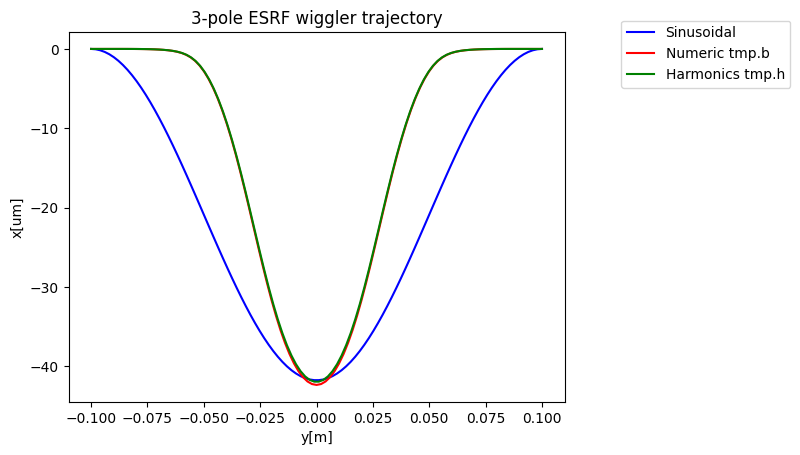

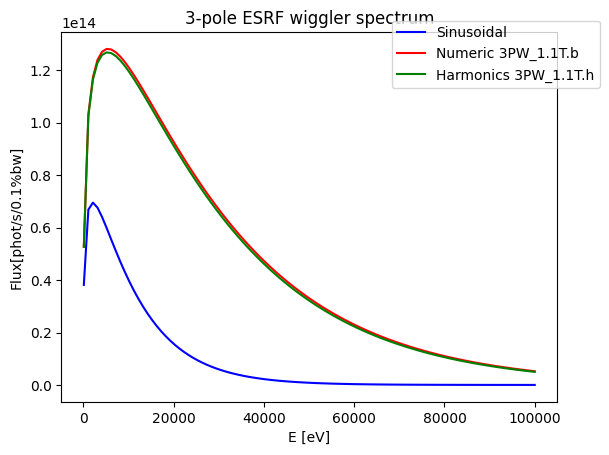

In [28]:
    from srxraylib.sources.srfunc import wiggler_trajectory, wiggler_spectrum, wiggler_harmonics
    print("#")
    print("# Example 9 (Wiggler trajectory and flux for a 3pole wiggler ")
    print("#")

    # this is the B(s) map (T, m)
    b_t = numpy.array([[ -1.00000000e-01,   1.08200000e-03],
   [ -9.80000000e-02,   8.23000000e-04],
   [ -9.60000000e-02,   4.45000000e-04],
   [ -9.40000000e-02,   8.60000000e-05],
   [ -9.20000000e-02,  -4.93000000e-04],
   [ -9.00000000e-02,  -1.20800000e-03],
   [ -8.80000000e-02,  -2.16100000e-03],
   [ -8.60000000e-02,  -3.44500000e-03],
   [ -8.40000000e-02,  -5.10500000e-03],
   [ -8.20000000e-02,  -7.34500000e-03],
   [ -8.00000000e-02,  -1.03050000e-02],
   [ -7.80000000e-02,  -1.42800000e-02],
   [ -7.60000000e-02,  -1.96770000e-02],
   [ -7.40000000e-02,  -2.70560000e-02],
   [ -7.20000000e-02,  -3.73750000e-02],
   [ -7.00000000e-02,  -5.20600000e-02],
   [ -6.80000000e-02,  -7.35170000e-02],
   [ -6.60000000e-02,  -1.05680000e-01],
   [ -6.40000000e-02,  -1.54678000e-01],
   [ -6.20000000e-02,  -2.28784000e-01],
   [ -6.00000000e-02,  -3.34838000e-01],
   [ -5.80000000e-02,  -4.70272000e-01],
   [ -5.60000000e-02,  -6.16678000e-01],
   [ -5.40000000e-02,  -7.46308000e-01],
   [ -5.20000000e-02,  -8.39919000e-01],
   [ -5.00000000e-02,  -8.96470000e-01],
   [ -4.80000000e-02,  -9.26065000e-01],
   [ -4.60000000e-02,  -9.38915000e-01],
   [ -4.40000000e-02,  -9.40738000e-01],
   [ -4.20000000e-02,  -9.32236000e-01],
   [ -4.00000000e-02,  -9.08918000e-01],
   [ -3.80000000e-02,  -8.60733000e-01],
   [ -3.60000000e-02,  -7.73534000e-01],
   [ -3.40000000e-02,  -6.36577000e-01],
   [ -3.20000000e-02,  -4.52611000e-01],
   [ -3.00000000e-02,  -2.37233000e-01],
   [ -2.80000000e-02,  -7.09700000e-03],
   [ -2.60000000e-02,   2.26731000e-01],
   [ -2.40000000e-02,   4.54558000e-01],
   [ -2.20000000e-02,   6.61571000e-01],
   [ -2.00000000e-02,   8.29058000e-01],
   [ -1.80000000e-02,   9.45984000e-01],
   [ -1.60000000e-02,   1.01683300e+00],
   [ -1.40000000e-02,   1.05536200e+00],
   [ -1.20000000e-02,   1.07490000e+00],
   [ -1.00000000e-02,   1.08444200e+00],
   [ -8.00000000e-03,   1.08898000e+00],
   [ -6.00000000e-03,   1.09111200e+00],
   [ -4.00000000e-03,   1.09208300e+00],
   [ -2.00000000e-03,   1.09249400e+00],
   [  0.00000000e+00,   1.09262000e+00],
   [  2.00000000e-03,   1.09249400e+00],
   [  4.00000000e-03,   1.09208300e+00],
   [  6.00000000e-03,   1.09111200e+00],
   [  8.00000000e-03,   1.08898000e+00],
   [  1.00000000e-02,   1.08444200e+00],
   [  1.20000000e-02,   1.07490000e+00],
   [  1.40000000e-02,   1.05536200e+00],
   [  1.60000000e-02,   1.01683300e+00],
   [  1.80000000e-02,   9.45984000e-01],
   [  2.00000000e-02,   8.29058000e-01],
   [  2.20000000e-02,   6.61571000e-01],
   [  2.40000000e-02,   4.54558000e-01],
   [  2.60000000e-02,   2.26731000e-01],
   [  2.80000000e-02,  -7.09700000e-03],
   [  3.00000000e-02,  -2.37233000e-01],
   [  3.20000000e-02,  -4.52611000e-01],
   [  3.40000000e-02,  -6.36577000e-01],
   [  3.60000000e-02,  -7.73534000e-01],
   [  3.80000000e-02,  -8.60733000e-01],
   [  4.00000000e-02,  -9.08918000e-01],
   [  4.20000000e-02,  -9.32236000e-01],
   [  4.40000000e-02,  -9.40738000e-01],
   [  4.60000000e-02,  -9.38915000e-01],
   [  4.80000000e-02,  -9.26065000e-01],
   [  5.00000000e-02,  -8.96470000e-01],
   [  5.20000000e-02,  -8.39919000e-01],
   [  5.40000000e-02,  -7.46308000e-01],
   [  5.60000000e-02,  -6.16678000e-01],
   [  5.80000000e-02,  -4.70272000e-01],
   [  6.00000000e-02,  -3.34838000e-01],
   [  6.20000000e-02,  -2.28784000e-01],
   [  6.40000000e-02,  -1.54678000e-01],
   [  6.60000000e-02,  -1.05680000e-01],
   [  6.80000000e-02,  -7.35170000e-02],
   [  7.00000000e-02,  -5.20600000e-02],
   [  7.20000000e-02,  -3.73750000e-02],
   [  7.40000000e-02,  -2.70560000e-02],
   [  7.60000000e-02,  -1.96770000e-02],
   [  7.80000000e-02,  -1.42800000e-02],
   [  8.00000000e-02,  -1.03050000e-02],
   [  8.20000000e-02,  -7.34500000e-03],
   [  8.40000000e-02,  -5.10500000e-03],
   [  8.60000000e-02,  -3.44500000e-03],
   [  8.80000000e-02,  -2.16100000e-03],
   [  9.00000000e-02,  -1.20800000e-03],
   [  9.20000000e-02,  -4.93000000e-04],
   [  9.40000000e-02,   8.60000000e-05],
   [  9.60000000e-02,   4.45000000e-04],
   [  9.80000000e-02,   8.23000000e-04],
   [  1.00000000e-01,   1.08200000e-03]])



    # normal (sinusoidal) wiggler
    t0,p = wiggler_trajectory(b_from=0, nPer=1, nTrajPoints=100,  \
                             ener_gev=6.04, per=0.2, kValue=7.75, \
                             trajFile="tmpS.traj")

    # magnetic field from B(s) map
    t1,p = wiggler_trajectory(b_from=1, nPer=1, nTrajPoints=100,  \
                   ener_gev=6.04, inData=b_t,trajFile="tmpB.traj")
    # magnetic field from harmonics
    hh = wiggler_harmonics(b_t,Nh=41,fileOutH="tmp.h")
    t2,p = wiggler_trajectory(b_from=2, nPer=1, nTrajPoints=100,  \
                   ener_gev=6.04, per=0.2, inData=hh,trajFile="tmpH.traj")


    toptitle = "3-pole ESRF wiggler trajectory"
    xtitle   = "y[m]"
    ytitle   = "x[um]"

    if pltOk:
        plt.figure(91)
        plt.plot(t0[1,:],1e6*t0[0,:],'b',label="Sinusoidal")
        plt.plot(t1[1,:],1e6*t1[0,:],'r',label="Numeric tmp.b")
        plt.plot(t2[1,:],1e6*t2[0,:],'g',label="Harmonics tmp.h")
        plt.title(toptitle)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
        ax = plt.subplot(111)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
    else:
        print("\n\n\n\n\n#########  %s ######### "%(toptitle))
        print(" x[m]  y[m]  z[m]  BetaX  BetaY  BetaZ  Curvature  B[T] ")
        for i in range(t2.shape[1]):
            print(("%.2e "*8+"\n")%( tuple(t2[0,i] for i in range(t2.shape[0])   )))
    if True:
        #
        # now spectra
        #
        e, f0, tmp = wiggler_spectrum(t0,enerMin=100.0,enerMax=100000.0,nPoints=100, \
                     electronCurrent=0.2, outFile="tmp.dat", elliptical=False)
        e, f1, tmp = wiggler_spectrum(t1,enerMin=100.0,enerMax=100000.0,nPoints=100, \
                     electronCurrent=0.2, outFile="tmp.dat", elliptical=False)
        e, f2, tmp = wiggler_spectrum(t2,enerMin=100.0,enerMax=100000.0,nPoints=100, \
                     electronCurrent=0.2, outFile="tmp.dat", elliptical=False)

        toptitle = "3-pole ESRF wiggler spectrum"
        xtitle   = "E [eV]"
        ytitle   = "Flux[phot/s/0.1%bw]"

        if pltOk:
            plt.figure(92)
            plt.plot(e,f0,'b',label="Sinusoidal")
            plt.plot(e,f1,'r',label="Numeric 3PW_1.1T.b")
            plt.plot(e,f2,'g',label="Harmonics 3PW_1.1T.h")
            plt.title(toptitle)
            plt.xlabel(xtitle)
            plt.ylabel(ytitle)
            ax = plt.subplot(111)
            ax.legend(bbox_to_anchor=(1.1, 1.05))
        else:
            print("\n\n\n\n\n#########  %s ######### "%(toptitle))
            print(" energy[eV] flux_sinusoidal  flux_fromB  flux_fromHarmonics  ")
            for i in range(t2.shape[1]):
                print(("%.2e "*4+"\n")%( e[i],f0[i], f1[i], f2[i] ))